In [4]:
import pandas as pd 


In [86]:
data = pd.read_csv(r'C:\Users\joema\Downloads\starbucks1.csv.csv')

In [87]:
print(data.head(2))

  Beverage_category       Beverage Beverage_prep  Calories  Total Fat (g)  \
0            Coffee  Brewed Coffee         Short         3            0.1   
1            Coffee  Brewed Coffee          Tall         4            0.1   

   Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  Total Carbohydrates (g)  \
0            0.0                0.0            0                        5   
1            0.0                0.0            0                       10   

   Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)     Protein (g)  \
0                 0                  0              0          0.3   
1                 0                  0              0          0.5   

  Vitamin A (% DV) Vitamin C (% DV) Calcium (% DV) Iron (% DV) Caffeine (mg)  
0               0%               0%             0%          0%           175  
1               0%               0%             0%          0%           260  


In [88]:
beverage_category_counts = data['Beverage_category'].value_counts().reset_index()
beverage_category_counts.columns = ['Beverage_category', 'count']

print(beverage_category_counts)

                   Beverage_category  count
0            Classic Espresso Drinks     58
1                   Tazo® Tea Drinks     52
2          Signature Espresso Drinks     40
3        Frappuccino® Blended Coffee     36
4              Shaken Iced Beverages     18
5         Frappuccino® Blended Crème     13
6  Frappuccino® Light Blended Coffee     12
7                          Smoothies      9
8                             Coffee      4


In [91]:
beverage_count = data['Beverage'].value_counts().reset_index()
beverage_count_columns = ['Beverage', 'count']

print(beverage_count)

                                             Beverage  count
0     Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)     12
1       White Chocolate Mocha (Without Whipped Cream)     12
2                           Tazo® Full-Leaf Tea Latte     12
3                               Tazo® Green Tea Latte     12
4                                Tazo® Chai Tea Latte     12
5                                              Coffee     12
6               Hot Chocolate (Without Whipped Cream)     12
7                                   Caramel Macchiato     12
8                                          Cappuccino     12
9            Vanilla Latte (Or Other Flavoured Latte)     12
10                Caffè Mocha (Without Whipped Cream)     12
11                                        Caffè Latte     12
12     Iced Brewed Coffee (With Milk & Classic Syrup)      9
13                    Caramel (Without Whipped Cream)      9
14                  Java Chip (Without Whipped Cream)      9
15                      

In [128]:
Columns_of_interest = ['Calories', 'Sugars (g)   ']

highest_calorie_coffee = data[['Beverage_category','Calories']].max()

print(f"Highest calories in coffee :  {highest_calorie_coffee}")
                        

grouped_stats = data.groupby('Beverage_category')[Columns_of_interest].agg(['mean', 'median', 'var', 'std', 'min', 'max'])

print(grouped_stats)

Highest calories in coffee :  Beverage_category    Tazo® Tea Drinks
Calories                          510
dtype: object
                                     Calories                       \
                                         mean median           var   
Beverage_category                                                    
Classic Espresso Drinks            140.172414  125.0   6777.162734   
Coffee                               4.250000    4.5      0.916667   
Frappuccino® Blended Coffee        276.944444  270.0   6616.111111   
Frappuccino® Blended Crème         233.076923  230.0   3806.410256   
Frappuccino® Light Blended Coffee  162.500000  150.0   3402.272727   
Shaken Iced Beverages              114.444444  110.0   1567.320261   
Signature Espresso Drinks          250.000000  240.0  10651.282051   
Smoothies                          282.222222  290.0    169.444444   
Tazo® Tea Drinks                   177.307692  170.0   9612.217195   

                                       

                         Calories  Total Carbohydrates (g)  Sugars (g)     \
Calories                 1.000000                 0.795037       0.909675   
Total Carbohydrates (g)  0.795037                 1.000000       0.771407   
Sugars (g)               0.909675                 0.771407       1.000000   
Total Fat (g)            0.576144                 0.429879       0.332821   
Protein (g)              0.578453                 0.410629       0.263061   

                         Total Fat (g)  Protein (g)  
Calories                      0.576144     0.578453  
Total Carbohydrates (g)       0.429879     0.410629  
Sugars (g)                    0.332821     0.263061  
Total Fat (g)                 1.000000     0.450749  
Protein (g)                   0.450749     1.000000  


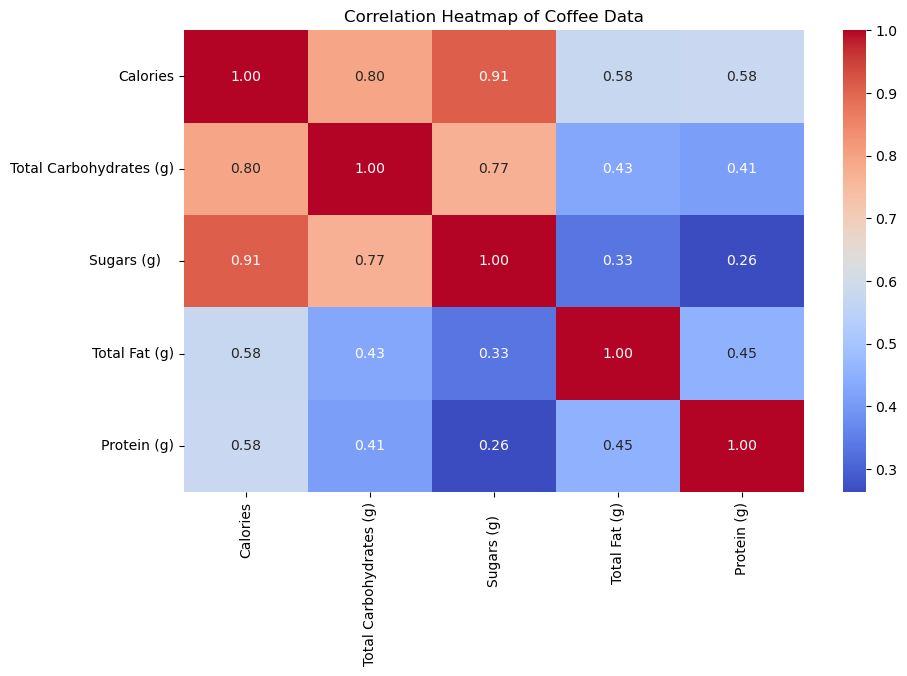

In [94]:
# Compute the correlation matrix using Pearson correlation (default)
corr_matrix = data[['Calories', 'Total Carbohydrates (g)', 'Sugars (g)   ', 'Total Fat (g)', 'Protein (g)']].corr()

# Print the correlation matrix
print(corr_matrix)

import seaborn as sns 

# Plotting the heatmap to visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Coffee Data')
plt.show()

In [103]:
good_nutrient_markers = ['Dietary Fibre (g)', 'Protein (g)']

grouped_stats = data.groupby('Beverage_category')[good_nutrient_markers].agg(['median', 'std', 'min', 'max'])

print(grouped_stats)

                                  Dietary Fibre (g)                    \
                                             median       std min max   
Beverage_category                                                       
Classic Espresso Drinks                         0.0  0.914361   0   4   
Coffee                                          0.0  0.000000   0   0   
Frappuccino® Blended Coffee                     1.0  0.831904   0   3   
Frappuccino® Blended Crème                      0.0  0.480384   0   1   
Frappuccino® Light Blended Coffee               0.5  0.778499   0   2   
Shaken Iced Beverages                           0.0  0.000000   0   0   
Signature Espresso Drinks                       0.5  0.973692   0   4   
Smoothies                                       7.0  0.666667   6   8   
Tazo® Tea Drinks                                0.0  0.851536   0   4   

                                  Protein (g)                        
                                       median       s

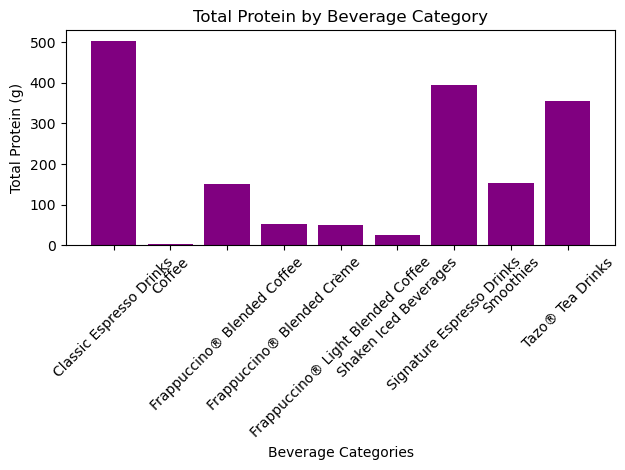

In [132]:
import matplotlib.pyplot as plt

# Group by 'Beverage_category' and sum 'Protein (g)'
grouped_data = data.groupby('Beverage_category')['Protein (g)'].sum()

# Extract the categories (x) and corresponding sums (y)
x = grouped_data.index       # Beverage categories
y = grouped_data.values      # Sum of Protein (g) for each category

# Create the bar chart
plt.bar(x, y, color='purple')

# Add labels and title
plt.xlabel('Beverage Categories')  # Label for X-axis
plt.ylabel('Total Protein (g)')    # Label for Y-axis
plt.title('Total Protein by Beverage Category')  # Chart title

# Display the chart
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()       # Adjust layout for better fit
plt.show()
